<a href="https://colab.research.google.com/github/DonaldGubin/MLandDL/blob/main/compositions_of_algorythms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Binary classification

Solution of the binary classification problem, namely, the construction of an algorithm that determines whether the average earnings of a person exceed the threshold of $50k. Each sample object is a person for whom the following features are known:
 - age
 - workclass
 - fnlwgt
 - education
 - education-num
 - marital-status
 - occupation
 - relationship
 - race
 - sex
 - capital-gain
 - capital-loss
 - hours-per-week

##Metric - ROC-AUC



## Data loading and processing


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
!gdown 1qKakViWhNT1yTiM66V9hxADAVCYTL0PO

Downloading...
From: https://drive.google.com/uc?id=1qKakViWhNT1yTiM66V9hxADAVCYTL0PO
To: /content/data_train.csv
100% 1.40M/1.40M [00:00<00:00, 68.3MB/s]


In [ ]:
data = pd.read_csv('data_train.csv')

In [ ]:
data.shape

(14734, 14)

In [ ]:
data[:10]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K
5,18,Private,446771,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,25,<=50K
6,31,Federal-gov,108464,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,<=50K
7,18,?,423460,11th,7,Never-married,?,Own-child,White,Male,0,0,36,<=50K
8,25,Private,110138,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,40,<=50K
9,53,Federal-gov,167410,Bachelors,13,Divorced,Tech-support,Not-in-family,Amer-Indian-Eskimo,Male,0,0,40,<=50K


In [ ]:
data.replace('?',np.nan, inplace = True)
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14729,18,Private,395567,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,<=50K
14730,62,NaN,94931,Assoc-voc,11,Married-civ-spouse,NaN,Husband,White,Male,3411,0,40,<=50K
14731,34,Private,261023,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1651,38,<=50K
14732,26,Private,195327,HS-grad,9,Never-married,Sales,Own-child,White,Male,0,0,40,<=50K


In [ ]:
from sklearn import preprocessing

In [ ]:
encoders = {}
encoders['>50K,<=50K'] = preprocessing.LabelEncoder()
data['>50K,<=50K'] = encoders['>50K,<=50K'].fit_transform(data['>50K,<=50K'])
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,0
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,0
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,0
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,0
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14729,18,Private,395567,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,0
14730,62,NaN,94931,Assoc-voc,11,Married-civ-spouse,NaN,Husband,White,Male,3411,0,40,0
14731,34,Private,261023,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1651,38,0
14732,26,Private,195327,HS-grad,9,Never-married,Sales,Own-child,White,Male,0,0,40,0


In [ ]:
y = data['>50K,<=50K']
y = y.astype(np.int32, copy=False)
y

,">50K,<=50K"
0,0
1,0
2,0
3,0
4,1
5,0
6,0
7,0
8,0
9,0


In [ ]:
data = data.drop('>50K,<=50K', axis = 1)

In [ ]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14729,18,Private,395567,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40
14730,62,NaN,94931,Assoc-voc,11,Married-civ-spouse,NaN,Husband,White,Male,3411,0,40
14731,34,Private,261023,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1651,38
14732,26,Private,195327,HS-grad,9,Never-married,Sales,Own-child,White,Male,0,0,40


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14734 entries, 0 to 14733
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             14734 non-null  int64 
 1   workclass       13874 non-null  object
 2   fnlwgt          14734 non-null  int64 
 3   education       14734 non-null  object
 4   education-num   14734 non-null  int64 
 5   marital-status  14734 non-null  object
 6   occupation      13870 non-null  object
 7   relationship    14734 non-null  object
 8   race            14734 non-null  object
 9   sex             14734 non-null  object
 10  capital-gain    14734 non-null  int64 
 11  capital-loss    14734 non-null  int64 
 12  hours-per-week  14734 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 1.5+ MB


In [ ]:
real_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

real_data = data[real_columns]
real_data[:10]

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,34,284843,9,594,0,60
1,40,190290,10,0,0,40
2,36,177858,13,0,0,40
3,22,184756,10,0,0,30
4,47,149700,13,15024,0,40
5,18,446771,10,0,0,25
6,31,108464,12,0,0,40
7,18,423460,7,0,0,36
8,25,110138,9,0,0,40
9,53,167410,13,0,0,40


In [ ]:
cat_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']

cat_data = data[cat_columns]
cat_data[:10]

,workclass,education,marital-status,occupation,relationship,race,sex
0,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male
1,Private,Some-college,Divorced,Sales,Not-in-family,White,Male
2,Local-gov,Bachelors,Married-civ-spouse,Prof-specialty,Own-child,White,Male
3,Private,Some-college,Never-married,Sales,Own-child,White,Female
4,Private,Bachelors,Married-civ-spouse,Tech-support,Husband,White,Male
5,Private,Some-college,Never-married,Adm-clerical,Own-child,White,Male
6,Federal-gov,Assoc-acdm,Married-civ-spouse,Tech-support,Husband,White,Male
7,NaN,11th,Never-married,NaN,Own-child,White,Male
8,Private,HS-grad,Never-married,Other-service,Not-in-family,White,Male
9,Federal-gov,Bachelors,Divorced,Tech-support,Not-in-family,Amer-Indian-Eskimo,Male


### One-hot encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
one_hot_data = ohe.fit_transform(cat_data)
fn = ohe.get_feature_names_out(cat_columns)
one_hot_data = pd.DataFrame(one_hot_data, index=cat_data.index, columns=fn)
one_hot_data[:10]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,workclass_nan,education_10th,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_real_data, test_real_data, \
train_cat_data, test_cat_data, train_one_hot_data, test_one_hot_data, \
y_train, y_test = train_test_split(data, real_data,
                                   cat_data, one_hot_data,
                                   y, train_size=0.7)

In [ ]:
!gdown 1tguHTZm9-sUwTRzqAEuqLRUzKHqkvVmQ

Downloading...
From: https://drive.google.com/uc?id=1tguHTZm9-sUwTRzqAEuqLRUzKHqkvVmQ
To: /content/data_scoring.csv
100% 139k/139k [00:00<00:00, 70.5MB/s]


In [ ]:
scoring_data = pd.read_csv('data_scoring.csv')
scoring_data.replace('?',np.nan,inplace=True)
scoring_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
0,17,NaN,256173,10th,6,Never-married,NaN,Own-child,White,Female,0,0,15
1,31,Private,265706,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,40
2,61,Self-emp-not-inc,244087,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,52
3,60,Local-gov,232618,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40
4,56,Private,34626,Some-college,10,Divorced,Exec-managerial,Not-in-family,White,Female,0,1980,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,25,Local-gov,514716,Bachelors,13,Never-married,Adm-clerical,Own-child,Black,Female,0,0,40
1542,32,Private,207668,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,45
1543,27,Private,104457,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,Asian-Pac-Islander,Male,0,0,40
1544,59,State-gov,268700,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40


In [ ]:
scoring_real_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

scoring_real_data = scoring_data[scoring_real_columns]
scoring_real_data[:10]

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,17,256173,6,0,0,15
1,31,265706,13,0,0,40
2,61,244087,9,0,0,52
3,60,232618,9,0,0,40
4,56,34626,10,0,1980,40
5,55,213615,9,0,0,40
6,25,245369,9,0,0,35
7,62,186696,9,0,0,40
8,39,165186,10,0,0,45
9,44,368757,10,0,0,40


In [ ]:
scoring_cat_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']

scoring_cat_data = scoring_data[scoring_cat_columns]
scoring_cat_data[:10]

,workclass,education,marital-status,occupation,relationship,race,sex
0,NaN,10th,Never-married,NaN,Own-child,White,Female
1,Private,Bachelors,Never-married,Sales,Not-in-family,White,Male
2,Self-emp-not-inc,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male
3,Local-gov,HS-grad,Married-civ-spouse,Other-service,Husband,White,Male
4,Private,Some-college,Divorced,Exec-managerial,Not-in-family,White,Female
5,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male
6,Self-emp-not-inc,HS-grad,Separated,Craft-repair,Own-child,White,Male
7,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male
8,Private,Some-college,Married-civ-spouse,Farming-fishing,Husband,White,Male
9,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,White,Male


In [ ]:
scoring_one_hot_data = ohe.fit_transform(scoring_cat_data)
fn = ohe.get_feature_names_out(scoring_cat_columns)
scoring_one_hot_data = pd.DataFrame(scoring_one_hot_data, index=scoring_cat_data.index, columns=fn)
scoring_one_hot_data[:10]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_nan,education_10th,education_11th,education_12th,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


## Random forest training
I will use the `RandomForestClassifier` model from `sklearn.ensemble`. It is necessary to find an optimal depth parameter for a random forest.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
train_data_for_forest = pd.concat([train_real_data, train_one_hot_data], axis='columns')
test_data_for_forest = pd.concat([test_real_data, test_one_hot_data], axis='columns')


In [ ]:
train_data_for_forest['marital-status_Married-AF-spouse']


,marital-status_Married-AF-spouse
7363,0.0
6346,0.0
2740,0.0
1058,0.0
4933,0.0
10137,0.0
9257,0.0
5927,0.0
5030,0.0
7251,0.0


In [ ]:
del train_data_for_forest['marital-status_Married-AF-spouse']
del train_data_for_forest['occupation_Armed-Forces']
del train_data_for_forest['workclass_Never-worked']
del train_data_for_forest['workclass_Without-pay']

In [ ]:
del test_data_for_forest['marital-status_Married-AF-spouse']
del test_data_for_forest['occupation_Armed-Forces']
del test_data_for_forest['workclass_Never-worked']
del test_data_for_forest['workclass_Without-pay']

### Finding the maximum parameter `max_depth` using cross-validation


In [ ]:
depths = np.arange(3, 20)
rf_metrics = []

for depth in depths:
    rfc = RandomForestClassifier(max_depth=depth, random_state=42)

    scores = cross_val_score(rfc,train_data_for_forest,y_train,cv=5,n_jobs=-1)

    rf_metrics.append(np.mean(scores))

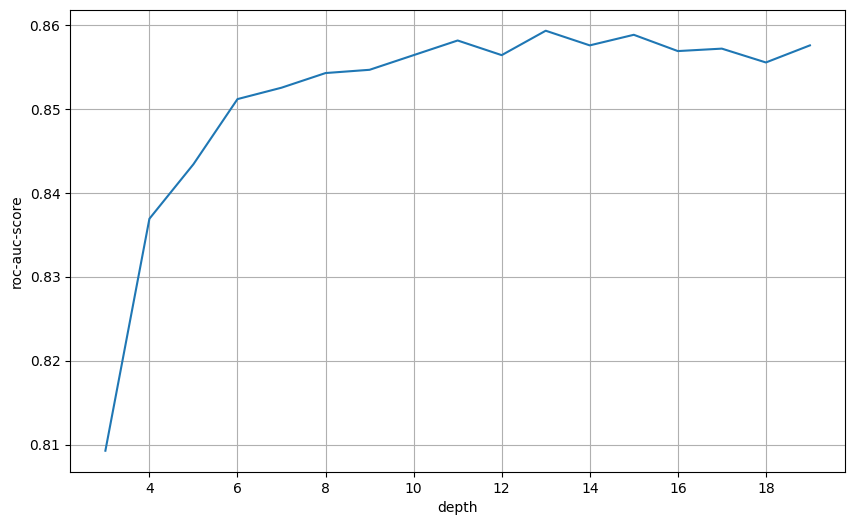

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(3, 20), rf_metrics)
plt.xlabel('depth')
plt.ylabel('roc-auc-score')
plt.grid()

In [ ]:
best_depth = 13

model = RandomForestClassifier(n_estimators=100, max_depth=best_depth)

model.fit(train_data_for_forest,y_train)


train_y_pred_forest = model.predict_proba(train_data_for_forest)
test_y_pred_forest = model.predict_proba(test_data_for_forest)

In [ ]:
train_y_pred_forest

array([[8.96183992e-01, 1.03816008e-01],
       [9.99635826e-01, 3.64174321e-04],
       [9.79759519e-01, 2.02404813e-02],
       ...,
       [7.53328692e-01, 2.46671308e-01],
       [9.96756241e-01, 3.24375861e-03],
       [9.85867085e-01, 1.41329148e-02]])

### ROC-AUC on the training and test set.


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
train_auc = roc_auc_score(y_train, train_y_pred_forest[:,1])
test_auc = roc_auc_score(y_test,test_y_pred_forest[:,1])
train_auc
test_auc

0.915175246010899

In [ ]:
assert test_auc > 0.90

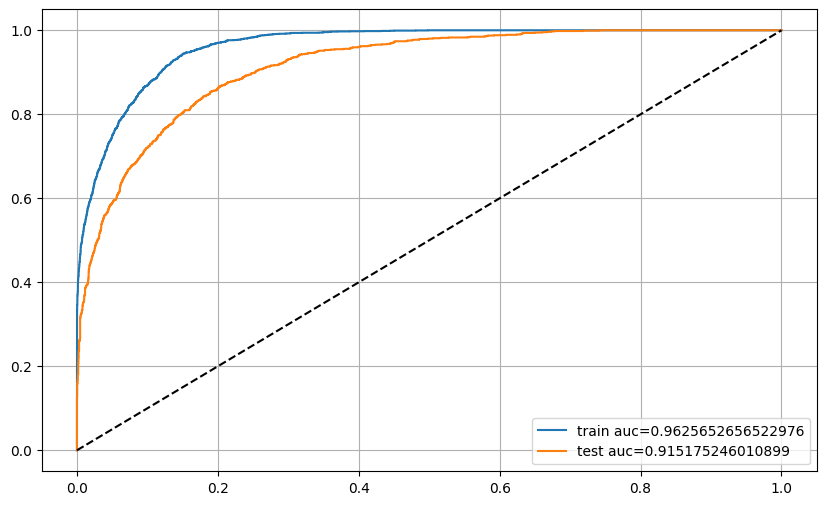

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(*roc_curve(y_train, train_y_pred_forest[:,1])[:2],
         label=f'train auc={train_auc}')
plt.plot(*roc_curve(y_test, test_y_pred_forest[:,1])[:2],
         label=f'test auc={test_auc}')


plt.plot([0,1], [0,1], '--', color='black')
plt.legend()
plt.grid()

In [ ]:
scoring_data_for_forest = pd.concat([scoring_real_data, scoring_one_hot_data], axis='columns')


In [ ]:
train_data_for_forest

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
10059,47,102583,9,0,0,30,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2905,57,143030,9,0,0,30,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7429,31,254293,10,0,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
130,55,277034,10,0,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3425,40,287008,15,15024,0,55,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4597,52,102828,9,7688,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
13506,34,324654,9,0,0,40,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5807,38,185556,10,0,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4885,45,263982,10,0,0,40,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
scoring_data_for_forest

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,17,256173,6,0,0,15,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,31,265706,13,0,0,40,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,61,244087,9,0,0,52,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,60,232618,9,0,0,40,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,56,34626,10,0,1980,40,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,25,514716,13,0,0,40,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1542,32,207668,13,15024,0,45,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1543,27,104457,13,0,0,40,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1544,59,268700,9,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
scoring_data_for_forest_1 = model.predict_proba(scoring_data_for_forest)
scoring_y_pred_forest = scoring_data_for_forest_1[:,1]
scoring_y_pred_forest

array([3.05671346e-04, 1.13479658e-01, 3.03351016e-01, ...,
       2.87947024e-02, 2.15055599e-01, 7.90012796e-01])

In [ ]:
pd.Series(scoring_y_pred_forest).to_csv('scoring_y_pred_forest.csv', header=None, index=None)

## Gradient Busting Training
I'm going to use the Catboost library. Catboost is a library for gradient bousting from Yandex. As the name suggests, it is characterized by convenient work with data, more precisely with categorical attributes

<img src="https://avatars.mds.yandex.net/i?id=53d991f7cac35c76bf747793019c39fb-3751806-images-thumbs&n=13&exp=1" style="height:400px; width:800px">


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.7 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier, Pool, cv

### Fill in the gaps in the data with the value 'unknown'.

In [ ]:
train_cat_data.isna().sum()

workclass         592
education           0
marital-status      0
occupation        596
relationship        0
race                0
sex                 0
dtype: int64

In [ ]:
train_cat_data = train_cat_data.fillna('unknown')
test_cat_data = test_cat_data.fillna('unknown')

In [ ]:
train_data_for_boosting = pd.concat([train_real_data,train_cat_data], axis='columns')
test_data_for_boosting = pd.concat([test_real_data, test_cat_data], axis='columns')

cat_features = np.arange(train_cat_data.shape[1]) + train_real_data.shape[1]

train_dataset = Pool(data=train_data_for_boosting,
                     label=y_train,
                     cat_features=cat_features)

test_dataset = Pool(data = test_data_for_boosting,
                    label=y_test,
                    cat_features=cat_features)

In [ ]:
data['hours-per-week'][-1:]

14733    40
Name: hours-per-week, dtype: int64

###average value of ROC-AUC metric by fouls

In [ ]:
depths = np.arange(3, 17)
boosting_metrics = []

for depth in depths:
    params = {"iterations": 100,
              "depth": depth,
              "loss_function": "Logloss",
              "custom_loss": "AUC",
              "verbose": False}

    scores = cv(train_dataset, params, fold_count=5)

    boosting_metrics.append(scores['test-AUC-mean'][-1:])

Training on fold [0/5]

bestTest = 0.3444336894
bestIteration = 99

Training on fold [1/5]

bestTest = 0.324616057
bestIteration = 99

Training on fold [2/5]

bestTest = 0.3217896695
bestIteration = 99

Training on fold [3/5]

bestTest = 0.331421911
bestIteration = 99

Training on fold [4/5]

bestTest = 0.3118086698
bestIteration = 99

Training on fold [0/5]

bestTest = 0.3371822898
bestIteration = 99

Training on fold [1/5]

bestTest = 0.3160043447
bestIteration = 99

Training on fold [2/5]

bestTest = 0.3130944308
bestIteration = 99

Training on fold [3/5]

bestTest = 0.3248431325
bestIteration = 99

Training on fold [4/5]

bestTest = 0.3043058684
bestIteration = 99

Training on fold [0/5]

bestTest = 0.3336298862
bestIteration = 99

Training on fold [1/5]

bestTest = 0.3111746886
bestIteration = 99

Training on fold [2/5]

bestTest = 0.3087063987
bestIteration = 99

Training on fold [3/5]

bestTest = 0.3200776668
bestIteration = 99

Training on fold [4/5]

bestTest = 0.2984445998
be

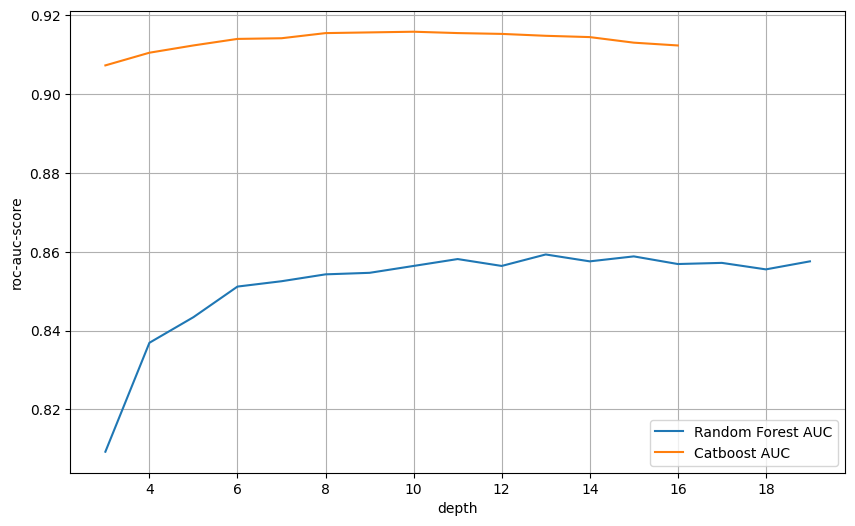

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(3, 20), rf_metrics, label='Random Forest AUC')
plt.plot(np.arange(3, 17), boosting_metrics, label='Catboost AUC')
plt.xlabel('depth')
plt.ylabel('roc-auc-score')
plt.grid()
plt.legend()

In [ ]:
best_depth = 10

model = CatBoostClassifier(iterations=500, depth = best_depth, loss_function='Logloss', verbose=False )

model.fit(train_dataset)


train_y_pred_boosting = model.predict_proba(train_dataset)
test_y_pred_boosting = model.predict_proba(test_dataset)

In [ ]:
train_y_pred_boosting

array([[9.80027912e-01, 1.99720881e-02],
       [9.99786402e-01, 2.13597710e-04],
       [9.98530081e-01, 1.46991875e-03],
       ...,
       [8.53604720e-01, 1.46395280e-01],
       [9.99568386e-01, 4.31614480e-04],
       [9.99406795e-01, 5.93205152e-04]])

In [ ]:
train_auc = roc_auc_score(y_train, train_y_pred_boosting[:,1])
test_auc = roc_auc_score(y_test, test_y_pred_boosting[:,1])

In [ ]:
assert test_auc > 0.915

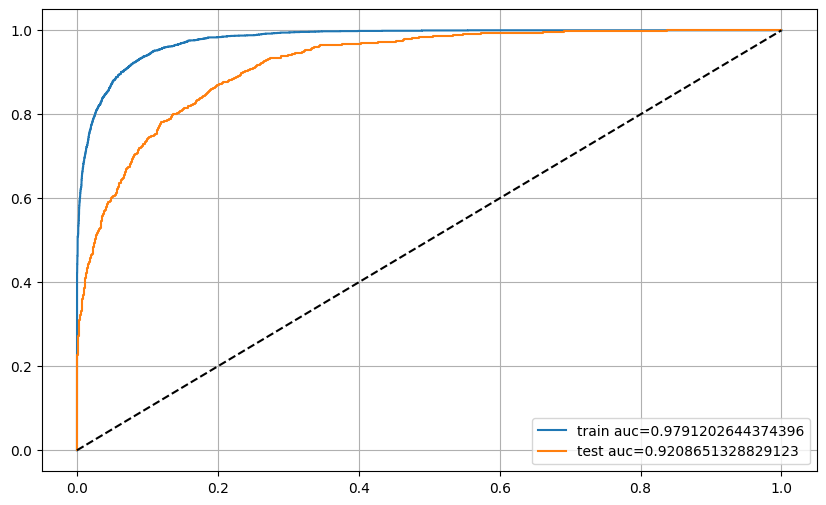

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(*roc_curve(y_train, train_y_pred_boosting[:,1])[:2],
         label=f'train auc={train_auc}')
plt.plot(*roc_curve(y_test, test_y_pred_boosting[:,1])[:2],
         label=f'test auc={test_auc}')

plt.plot([0,1], [0,1], '--', color='black')

plt.legend()
plt.grid()

In [ ]:
scoring_data = scoring_data.fillna('unknown')
scoring_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
0,17,unknown,256173,10th,6,Never-married,unknown,Own-child,White,Female,0,0,15
1,31,Private,265706,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,40
2,61,Self-emp-not-inc,244087,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,52
3,60,Local-gov,232618,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40
4,56,Private,34626,Some-college,10,Divorced,Exec-managerial,Not-in-family,White,Female,0,1980,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,25,Local-gov,514716,Bachelors,13,Never-married,Adm-clerical,Own-child,Black,Female,0,0,40
1542,32,Private,207668,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,45
1543,27,Private,104457,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,Asian-Pac-Islander,Male,0,0,40
1544,59,State-gov,268700,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40


In [ ]:
scoring_data_for_boosting = pd.concat([scoring_real_data, scoring_cat_data], axis='columns')

cat_features = np.arange(scoring_cat_data.shape[1]) + scoring_real_data.shape[1]

scoring_dataset = Pool(data=scoring_data_for_boosting, cat_features=cat_features, label = None)

In [ ]:
scoring_dataset

In [ ]:
scoring_y_pred_boosting1 = model.predict_proba(scoring_dataset)
scoring_y_pred_boosting = scoring_y_pred_boosting1[:,1]
scoring_y_pred_boosting

array([8.95146958e-05, 9.89770774e-02, 1.83192921e-01, ...,
       7.38669449e-03, 1.03822821e-01, 9.83651297e-01])

In [ ]:
with open('scoring_y_pred_boosting.txt', "w") as f:
    f.write(', '.join([str(item) for item in scoring_y_pred_boosting]))